 # homework ada11

### TMI M1 37-176839 Koichrio Tamura

#### homework1

固有値問題
$$L\psi  = \gamma D \psi $$
の最小固有値$\gamma_{n}$は0，対応する固有ベクトルは$\mathbf{1}$であることを示せ．
$$L = D- W$$
$$D = diag(\sum_{i'=1}^{n}{W_{i, i'}})$$

#### answer

まず，$\mathbf{L}$が半正定値性であることを示す。
任意のベクトル$\mathbf{\alpha}$に対して

\begin{eqnarray}
\mathbf{\alpha}^{T}\mathbf{L}\mathbf{\alpha} &=& \sum_{i,j=1}^{n}{L_{ij}a_{i}a_{j}}  \\
&=& \sum_{i=1}^{n}{a_{i}\sum_{j=1}^{n}{W_{ij}(a_{i}-a_{j})}}  \\
&=& \frac{1}{2} \sum_{i,j}{(a_{i}W_{ij} - a_{j}W_{ji})(a_{i} - a_{j})} \\
&=& \frac{1}{2}\sum_{i,j}{W_{ij}(a_{i}-a_{j})^{2}} \ge 0
\end{eqnarray}

であるから，$\mathbf{L}$は半正定値性である．

そして， 
$L = D - W$
であるから，

$\mathbf{L}$とベクトル$\mathbf{1}$の積のj番目の要素は，

$$\sum_{i' \neq j}^{n}{W_{j, i'}}  - W_{j,1} - W_{j,2} - ,,, - W_{j,j-1} - W_{j,j+1},,,- W_{j,n} = 0$$

となるので，確かに$\mathbf{L}$に対する固有ベクトル$\mathbf{1}$の固有値として0が存在している．
よって，題意は示された．


<div style="text-align: right;">
【Q.E.D】
</div>

#### homework2

最近傍類似度に対するラプラス固有写像を実装せよ

#### answer

参考: https://openbook4.me/sections/1504

(3, 1000)


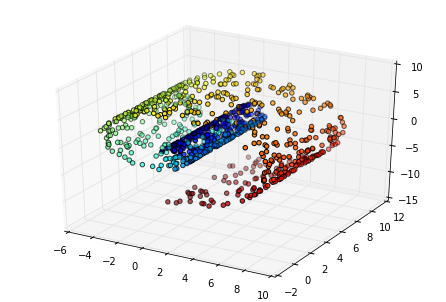

(1000, 3)


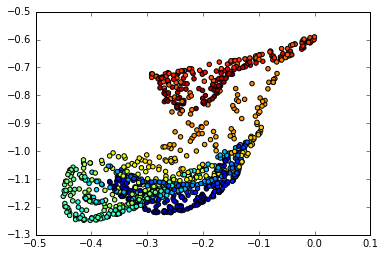

In [50]:
from scipy.spatial import distance
n = 1000    # データの数
h = 3
# データを生成する
data = np.array(3*np.pi*np.random.random(n))
 
# 三次元のデータを生成する
x = np.vstack((data*np.sin(data), 10*np.random.random(n), data*np.cos(data)))
print(x.shape)
# スイスロールの描画
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(
    x[0,:],x[1,:],x[2,:],
    c=data)
plt.show()
 
def laplace(X):
    """
    ラプラスを返す関数
    局所性保存射影の解は、固有値問題を解き、固有値を昇順に並べる
    """
    _x = X.T
    print(_x.shape)
    # 距離を計算
    dist_vec=distance.pdist(_x)
    dist_mat=distance.squareform(dist_vec)
    tmp = dist_mat <= np.sort(dist_mat, axis = 0)[20, :]      #k近傍  sortしてk列目をとる
    W = np.where(tmp, 1, 0)   #trueならば1 falseならば0にする
    W = W.T + W   #対称にする
    W = W / 2
    D=np.diag(np.sum(W,axis=1))
    L = D - W   #グラフラプラス行列
    k_matrix = np.exp(- dist_mat  / (2 * h ** 2))  #カーネルマトリックス
    return (X, W, D, L, k_matrix)
 
X, W, D, L, k_matrix = laplace(x)


D_inv_sqrt = np.diag(1. / np.sqrt(np.diag(D)))
tmp =  D_inv_sqrt.dot(L).dot(D_inv_sqrt)
w, v = np.linalg.eigh(tmp)
index = np.argsort(w)
 
v[index][1:3]
#埋め込み結果 固有値が0をとるとき以外の固有ベクトルをとっている。
#二次元におとすために二成分のみをとる。
 
# 次元圧縮後のデータを描画する
plt.scatter(v[index][1].dot(k_matrix), v[index][2].dot(k_matrix), c=data)
plt.show()
